In [6]:
# Install libraries if needed
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
df=pd.read_csv('traffic_accidents.csv')
print(df)

                    crash_date traffic_control_device weather_condition  \
0       07/29/2023 01:00:00 PM         TRAFFIC SIGNAL             CLEAR   
1       08/13/2023 12:11:00 AM         TRAFFIC SIGNAL             CLEAR   
2       12/09/2021 10:30:00 AM         TRAFFIC SIGNAL             CLEAR   
3       08/09/2023 07:55:00 PM         TRAFFIC SIGNAL             CLEAR   
4       08/19/2023 02:55:00 PM         TRAFFIC SIGNAL             CLEAR   
...                        ...                    ...               ...   
120257  01/11/2023 08:12:00 AM         TRAFFIC SIGNAL             CLEAR   
120258  07/16/2018 07:58:00 AM            NO CONTROLS             CLEAR   
120259  10/17/2023 03:33:00 PM         TRAFFIC SIGNAL             CLEAR   
120260  10/19/2020 08:47:00 PM         TRAFFIC SIGNAL              RAIN   
120261  09/28/2019 04:50:00 PM         TRAFFIC SIGNAL             CLEAR   

            lighting_condition first_crash_type  \
0                     DAYLIGHT          TURNING 

In [9]:
print(df.columns)

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')


In [10]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values (example: filling with mode for categorical columns)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numeric columns with median
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display cleaned data
df.info()


crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   1
injuries_fatal                   1
injuries_incapacitating          1
injuries_non_incapacitating      1
injuries_reported_not_evident    1
injuries_no_indication           1
crash_hour                       1
crash_day_of_week                1
crash_month                      1
dtype: int64


<ipython-input-10-61791cad35b5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-10-61791cad35b5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120262 entries, 0 to 120261
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     120262 non-null  int64  
 1   traffic_control_device         120262 non-null  int64  
 2   weather_condition              120262 non-null  int64  
 3   lighting_condition             120262 non-null  int64  
 4   first_crash_type               120262 non-null  int64  
 5   trafficway_type                120262 non-null  int64  
 6   alignment                      120262 non-null  int64  
 7   roadway_surface_cond           120262 non-null  int64  
 8   road_defect                    120262 non-null  int64  
 9   crash_type                     120262 non-null  int64  
 10  intersection_related_i         120262 non-null  int64  
 11  damage                         120262 non-null  int64  
 12  prim_contributory_cause       

In [11]:
# Define features and target
X = df.drop(['crash_type'], axis=1)  # Replace 'crash_type' if using another target
y = df['crash_type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.75      0.81     10543
           1       0.82      0.91      0.87     13510

    accuracy                           0.84     24053
   macro avg       0.85      0.83      0.84     24053
weighted avg       0.84      0.84      0.84     24053



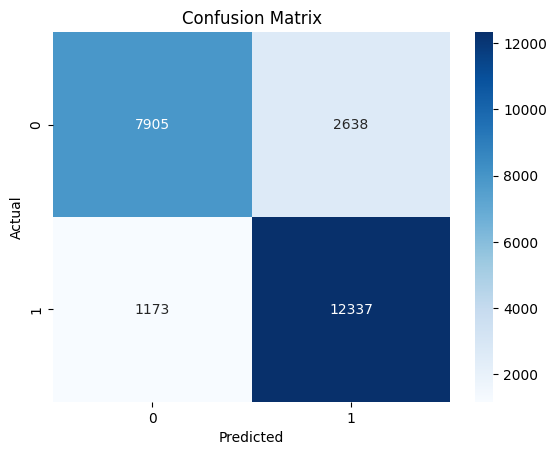

In [13]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit model to training data
grid_search.fit(X_train, y_train)

# Display best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.90      0.73      0.81     10543
           1       0.82      0.94      0.87     13510

    accuracy                           0.85     24053
   macro avg       0.86      0.83      0.84     24053
weighted avg       0.85      0.85      0.84     24053



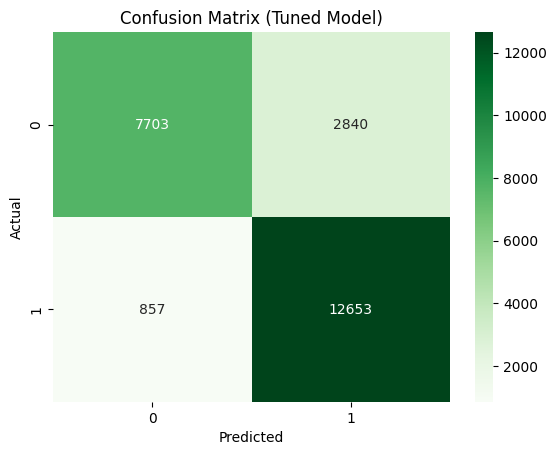

In [17]:
# Use the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict using the tuned model
y_pred_tuned = best_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_tuned))

# Confusion matrix
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Tuned Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

                          Feature  Importance
14                 injuries_total    0.217534
13             most_severe_injury    0.195029
17    injuries_non_incapacitating    0.084180
4                first_crash_type    0.078058
19         injuries_no_indication    0.070962
10                         damage    0.061369
18  injuries_reported_not_evident    0.047949
11        prim_contributory_cause    0.043100
0                      crash_date    0.040668
20                     crash_hour    0.033366


<ipython-input-18-67c2ae666497>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10), palette='viridis')


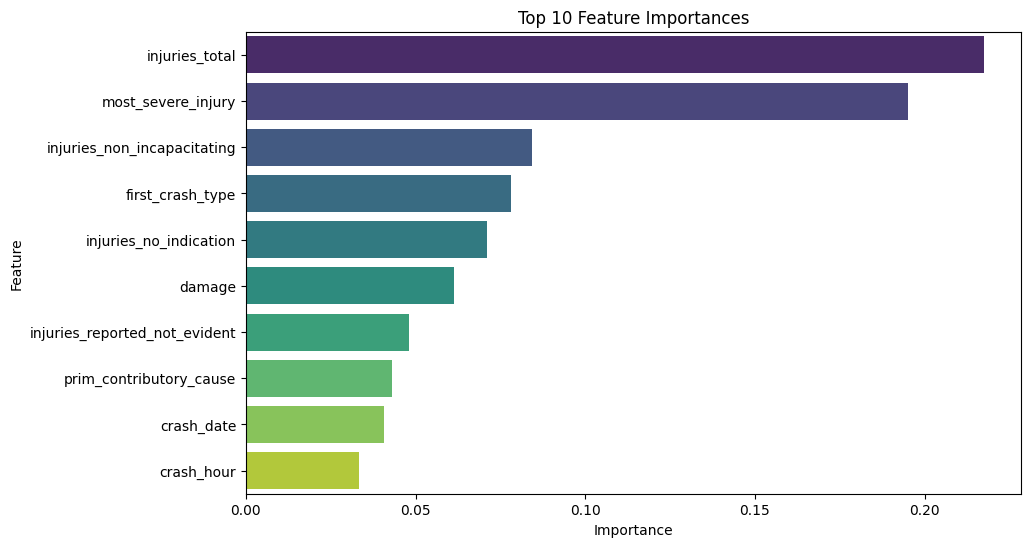

In [18]:
# Get feature importances from the model
importances = best_model.feature_importances_
features = X.columns

# Create DataFrame for visualization
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importances_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.show()

In [19]:
import joblib

# Save the model
joblib.dump(best_model, 'accident_prediction_model.pkl')

['accident_prediction_model.pkl']

In [21]:
# Load model
model = joblib.load('accident_prediction_model.pkl')

# Get the feature names used during training
training_features = model.feature_names_in_

# Example input (replace with user input from chatbot)
# Ensure all features used during training are included and in the correct order
user_input = pd.DataFrame({
    feature: [0] for feature in training_features  # Initialize all features to 0
})

# Update user input with actual values (replace with user input from chatbot)
user_input['weather_condition'] = [1]  # Example encoded value
user_input['lighting_condition'] = [2]
user_input['roadway_surface_cond'] = [0]
user_input['crash_hour'] = [14]
user_input['traffic_control_device'] = [3]
# ... Add other necessary features here ...


# Predict
prediction = model.predict(user_input)
print(f'Predicted Crash Type: {prediction[0]}')

Predicted Crash Type: 1


In [26]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [31]:
# List of features used during training
print(list(X.columns))

['crash_date', 'traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month']


In [35]:
# Before training the model
X = X.drop(['crash_date'], axis=1)

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

# Save the retrained model
import joblib
joblib.dump(model, 'accident_prediction_model.pkl')

['accident_prediction_model.pkl']

In [37]:
# Load the saved model
import joblib
import pandas as pd

model = joblib.load('accident_prediction_model.pkl')

# Simple chatbot function
def accident_prediction_chatbot():
    print("Welcome to the Accident Prediction Chatbot!")
    print("Please provide the following information:\n")

    # User inputs
    weather_condition = int(input("Weather Condition (0=Clear, 1=Rain, 2=Snow, etc.): "))
    lighting_condition = int(input("Lighting Condition (0=Daylight, 1=Dark, etc.): "))
    roadway_surface_cond = int(input("Road Surface Condition (0=Dry, 1=Wet, etc.): "))
    crash_hour = int(input("Crash Hour (0-23): "))
    traffic_control_device = int(input("Traffic Control Device (0=None, 1=Stop Sign, etc.): "))
    first_crash_type = int(input("First Crash Type (0=Rear-end, 1=Angle, etc.): "))
    alignment = int(input("Alignment (0=Straight, 1=Curve, etc.): "))
    prim_contributory_cause = int(input("Primary Cause (0=Speeding, 1=Distracted Driving, etc.): "))
    most_severe_injury = int(input("Most Severe Injury (0=None, 1=Minor, 2=Severe, 3=Fatal): "))

    # Default values for missing features
    crash_date = '2025-01-01'  # Placeholder date
    crash_day_of_week = 4       # Assuming Thursday (adjust as needed)
    crash_month = 1             # January
    damage = 0                  # No damage (adjust based on dataset encoding)
    num_units = 1               # Assuming a single vehicle
    intersection_related_i = 0  # Not at intersection
    injuries_total = 0
    injuries_fatal = 0
    injuries_incapacitating = 0
    injuries_non_incapacitating = 0
    injuries_reported_not_evident = 0
    injuries_no_indication = 0
    road_defect = 0             # Assuming no defect
    trafficway_type = 0         # Default trafficway type

    # Create DataFrame with all required features
    user_data = pd.DataFrame({
    'weather_condition': [weather_condition],
    'lighting_condition': [lighting_condition],
    'roadway_surface_cond': [roadway_surface_cond],
    'crash_hour': [crash_hour],
    'traffic_control_device': [traffic_control_device],
    'first_crash_type': [first_crash_type],
    'alignment': [alignment],
    'prim_contributory_cause': [prim_contributory_cause],
    'most_severe_injury': [most_severe_injury],
    'crash_day_of_week': [crash_day_of_week],
    'crash_month': [crash_month],
    'damage': [damage],
    'num_units': [num_units],
    'intersection_related_i': [intersection_related_i],
    'injuries_total': [injuries_total],
    'injuries_fatal': [injuries_fatal],
    'injuries_incapacitating': [injuries_incapacitating],
    'injuries_non_incapacitating': [injuries_non_incapacitating],
    'injuries_reported_not_evident': [injuries_reported_not_evident],
    'injuries_no_indication': [injuries_no_indication],
    'road_defect': [road_defect],
    'trafficway_type': [trafficway_type]
})

    # Ensure feature order matches the model's expectations
    user_data = user_data[X.columns]

    # Make prediction
    prediction = model.predict(user_data)
    print(f"\nPrediction: The predicted crash type is {prediction[0]}.")

# Run the chatbot
accident_prediction_chatbot()

Welcome to the Accident Prediction Chatbot!
Please provide the following information:

Weather Condition (0=Clear, 1=Rain, 2=Snow, etc.): 0
Lighting Condition (0=Daylight, 1=Dark, etc.): 0
Road Surface Condition (0=Dry, 1=Wet, etc.): 0
Crash Hour (0-23): 3
Traffic Control Device (0=None, 1=Stop Sign, etc.): 1
First Crash Type (0=Rear-end, 1=Angle, etc.): 0
Alignment (0=Straight, 1=Curve, etc.): 1
Primary Cause (0=Speeding, 1=Distracted Driving, etc.): 1
Most Severe Injury (0=None, 1=Minor, 2=Severe, 3=Fatal): 3

Prediction: The predicted crash type is 1.
